### Embedding Visualization

In [256]:
import numpy as np
import torch
from sklearn.manifold import TSNE

In [476]:
tsne = TSNE(random_state=1, n_components=2,  n_iter=15000, metric="euclidean", init="pca")

In [477]:
train_embeddings = torch.load("proto_results/train_embeddings_indv.pt")
test_embeddings = torch.load("proto_results/test_embeddings_indv.pt")

In [478]:
train, train_labels = train_embeddings["embeddings"].squeeze(dim=1),  train_embeddings["labels"]
test, test_labels = test_embeddings["embeddings"].squeeze(dim=1),  test_embeddings["labels"]


In [479]:
train.shape

torch.Size([250, 576])

In [480]:
train_embeds = tsne.fit_transform(train)

/home/datascience/conda/pytorch20_p39_gpu_v2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/home/datascience/conda/pytorch20_p39_gpu_v2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [481]:
# tsne = TSNE(random_state=1, n_iter=15000, metric="cosine")
test_embeds = tsne.fit_transform(test)

/home/datascience/conda/pytorch20_p39_gpu_v2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/home/datascience/conda/pytorch20_p39_gpu_v2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [483]:
stacked = np.vstack((train_embeds, test_embeds))

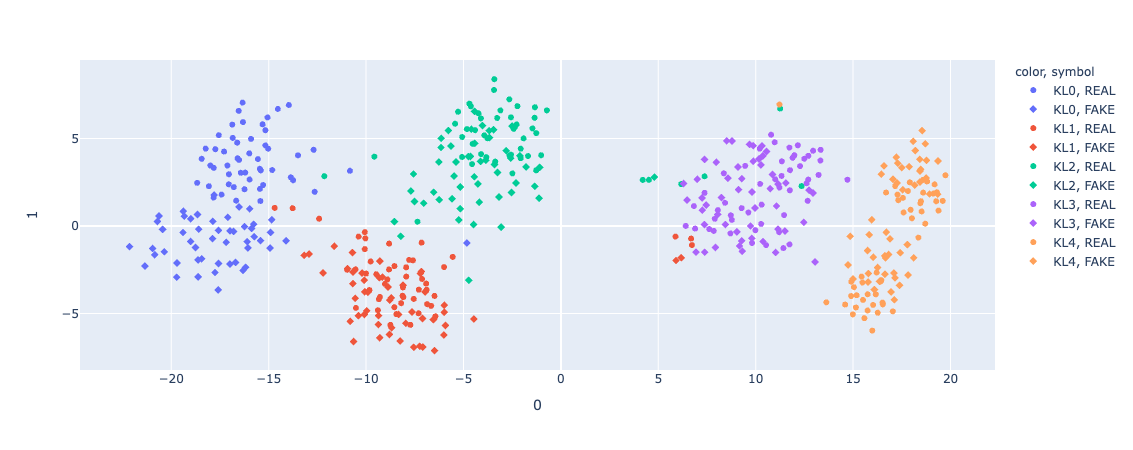

In [493]:
import plotly.express as px

import matplotlib.pyplot as plt
fig = px.scatter(stacked, x=0, y=1, color=train_labels + test_labels, symbol=["REAL"] * len(train_embeds) + ["FAKE"]*len(test_embeds))
fig.show()

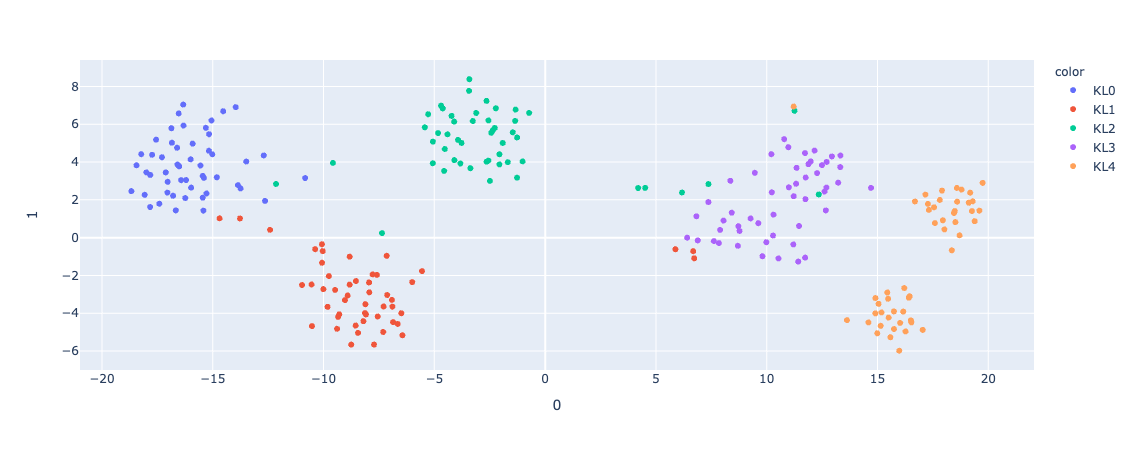

In [487]:
import plotly.express as px

import matplotlib.pyplot as plt
fig = px.scatter(train_embeds, x=0, y=1, color=train_labels)
fig.show()

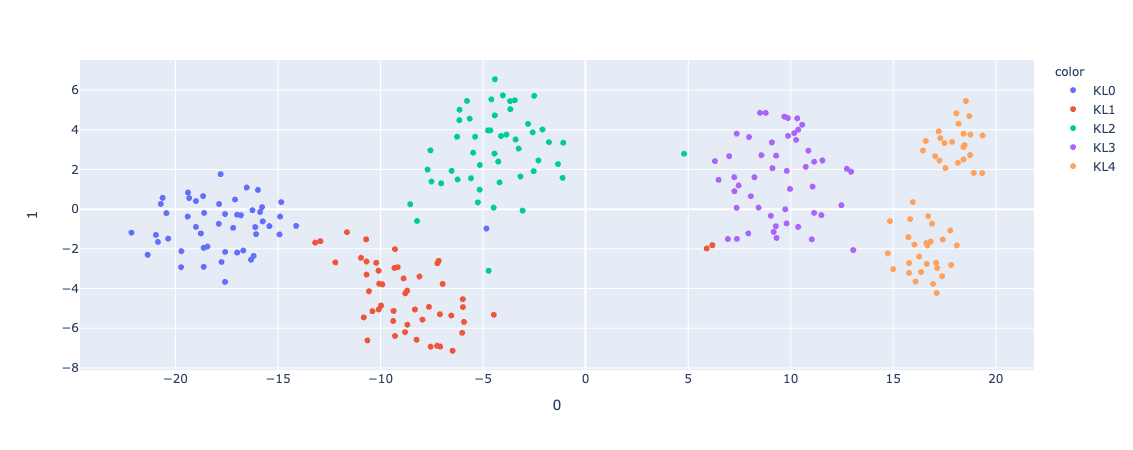

In [488]:
import plotly.express as px

import matplotlib.pyplot as plt
fig = px.scatter(test_embeds, x=0, y=1, color=test_labels)
fig.show()